# 2-1. Please implement a CNN for image recognition by using Stanford Dogs Dataset,then plot the learning curve and the accuracy rate of training and test data. (20%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import os # 讀檔需求
import torch.nn as nn
import torch.nn.functional as nnf

In [2]:
Path = '/home/309707001/DL/HW/HW1/DL_HW1/stanford_dogs_dataset/train/'
DIR = os.listdir(Path)
files = list()
labels = list()
w = 10000
l = 10000
for idx in range(len(DIR)):
    FILES = os.listdir(Path + DIR[idx])
    for jdx in range(len(FILES)):
        file = torch.from_numpy(np.array((Image.open(Path + DIR[idx] + '/' + FILES[jdx])).resize((110, 117))))
        file = file.permute(2, 0, 1)
        w = file.shape[1] if file.shape[1] < w else w
        l = file.shape[2] if file.shape[2] < l else l
        files.append(file)
        labels.append(idx)
        print('\r{0}/{1}--{2}/{3}'.format(idx + 1, len(DIR), jdx + 1, len(FILES)), end = '')

8/8--166/166

In [3]:
# Picture Resize
for idx in range(len(files)):
    files[idx] = files[idx][:, :w, :l]
# Data Transfer to tensor type
batch = torch.zeros(1328, 3, w, l)
for idx, obj in enumerate(files):
    batch[idx] = obj
# Labels turn into matrix type
blabel = torch.zeros(1328, 8)
for idx, obj in enumerate(labels):
    blabel[idx][obj] = 1

In [4]:
IDX = np.random.choice([i for i in range(166)], 166)
IDXX = IDX[(166*2//3):]
IDX2 = IDXX.copy()
IDX = IDX[:(166*2//3)]
IDX1 = IDX.copy()
print(IDX1.shape)
print(IDX2.shape)
for idx in range(1,8):
    IDX1 = np.concatenate([IDX + idx*166, IDX1])
    IDX2 = np.concatenate([IDXX + idx*166, IDX2])

(110,)
(56,)


In [7]:
# Layer Create
CNN1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5)
CNN2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
CNN3 = nn.Conv2d(in_channels = 16, out_channels = 1920, kernel_size = 5)
B1 = nn.BatchNorm2d(num_features = 6)
B2 = nn.BatchNorm2d(num_features = 16)
B3 = nn.BatchNorm2d(num_features = 1920)
US1 = nn.MaxPool2d(2)
US2 = nn.MaxPool2d(5)
DROP = nn.Dropout(0.2)
ACT1 = nn.ReLU()
ACT2 = nn.Softmax()
FLAT = nn.Flatten()
LIN = nn.Linear(30720, 8)
# Model Create
model = nn.Sequential(CNN1, #####
                      B1,
                      ACT1,
                      US1,
                      DROP,
                      CNN2, #####
                      B2,
                      ACT1,
                      US1,
                      DROP,
                      CNN3, #####
                      B3,
                      ACT1,
                      US2,
                      FLAT,
                      ACT2,
                      LIN)
Loss = nn.CrossEntropyLoss()
# Model Setting
lr = 1e-3
epochs = 400
loss_tr = list()
loss_ts = list()
acc_tr = list()
acc_ts = list()
OPT = torch.optim.Adam(model.parameters(), lr = lr)
for epoch in range(1, epochs + 1):
    outputs = model(batch[IDX1])
    prediction = torch.argmax(outputs, axis = 1)
    acc_tr.append((torch.argmax(outputs, axis = 1) == torch.tensor(labels)[IDX1]).sum()/outputs.shape[0])
    loss = Loss(outputs, blabel[IDX1])
    o_ts = model(batch[IDX2])
    loss2 = Loss(o_ts, blabel[IDX2])
    loss_tr.append(float(loss))
    acc_ts.append((torch.argmax(o_ts, axis = 1) == torch.tensor(labels)[IDX2]).sum()/o_ts.shape[0])
    loss_ts.append(float(loss2))
    OPT.zero_grad()
    loss.backward()
    OPT.step()
    print('Epoch Round:{0},train-Loss:{1}, Acc:{2}; test-Loss:{3}, Acc:{4}'.format(epoch, float(loss_tr[-1]),
                                                                                   acc_tr[-1], loss_ts[-1], acc_ts[-1]))

Epoch Round:1,train-Loss:2.079446315765381, Acc:0.125; test-Loss:2.079444169998169, Acc:0.125
Epoch Round:2,train-Loss:2.079329252243042, Acc:0.125; test-Loss:2.0793426036834717, Acc:0.125
Epoch Round:3,train-Loss:2.0791945457458496, Acc:0.125; test-Loss:2.079219341278076, Acc:0.125
Epoch Round:4,train-Loss:2.079044818878174, Acc:0.145454540848732; test-Loss:2.0790798664093018, Acc:0.1584821492433548
Epoch Round:5,train-Loss:2.07888126373291, Acc:0.2761363685131073; test-Loss:2.0789284706115723, Acc:0.2410714328289032
Epoch Round:6,train-Loss:2.078701972961426, Acc:0.271590918302536; test-Loss:2.0787551403045654, Acc:0.2209821492433548
Epoch Round:7,train-Loss:2.0784928798675537, Acc:0.24659091234207153; test-Loss:2.078585386276245, Acc:0.2232142835855484
Epoch Round:8,train-Loss:2.078279495239258, Acc:0.2590909004211426; test-Loss:2.078383684158325, Acc:0.2544642984867096
Epoch Round:9,train-Loss:2.0780558586120605, Acc:0.28295454382896423; test-Loss:2.0781748294830322, Acc:0.28125
Ep

Epoch Round:71,train-Loss:2.0186421871185303, Acc:0.6613636612892151; test-Loss:2.0342917442321777, Acc:0.5178571343421936
Epoch Round:72,train-Loss:2.0172693729400635, Acc:0.675000011920929; test-Loss:2.0331499576568604, Acc:0.5357142686843872
Epoch Round:73,train-Loss:2.0150563716888428, Acc:0.675000011920929; test-Loss:2.031864643096924, Acc:0.546875
Epoch Round:74,train-Loss:2.013272762298584, Acc:0.6875; test-Loss:2.0300450325012207, Acc:0.5223214030265808
Epoch Round:75,train-Loss:2.010922908782959, Acc:0.6875; test-Loss:2.0284011363983154, Acc:0.53125
Epoch Round:76,train-Loss:2.0094966888427734, Acc:0.6943181753158569; test-Loss:2.0283501148223877, Acc:0.53125
Epoch Round:77,train-Loss:2.007357597351074, Acc:0.6897727251052856; test-Loss:2.025754928588867, Acc:0.5535714030265808
Epoch Round:78,train-Loss:2.0054755210876465, Acc:0.7102272510528564; test-Loss:2.0243747234344482, Acc:0.5580357313156128
Epoch Round:79,train-Loss:2.002378225326538, Acc:0.7090908885002136; test-Loss:

Epoch Round:139,train-Loss:1.8480026721954346, Acc:0.8840909004211426; test-Loss:1.9213064908981323, Acc:0.6629464030265808
Epoch Round:140,train-Loss:1.8444011211395264, Acc:0.8772727251052856; test-Loss:1.9195117950439453, Acc:0.6540178656578064
Epoch Round:141,train-Loss:1.8427979946136475, Acc:0.8920454382896423; test-Loss:1.9165445566177368, Acc:0.6495535969734192
Epoch Round:142,train-Loss:1.8403732776641846, Acc:0.8863636255264282; test-Loss:1.9145164489746094, Acc:0.6651785969734192
Epoch Round:143,train-Loss:1.83555269241333, Acc:0.8920454382896423; test-Loss:1.9103955030441284, Acc:0.6741071343421936
Epoch Round:144,train-Loss:1.8335245847702026, Acc:0.8954545259475708; test-Loss:1.9119722843170166, Acc:0.6629464030265808
Epoch Round:145,train-Loss:1.8306899070739746, Acc:0.8954545259475708; test-Loss:1.9097528457641602, Acc:0.6674107313156128
Epoch Round:146,train-Loss:1.826649785041809, Acc:0.8977272510528564; test-Loss:1.906748652458191, Acc:0.6674107313156128
Epoch Round:

Epoch Round:207,train-Loss:1.662700891494751, Acc:0.9579545259475708; test-Loss:1.8001238107681274, Acc:0.7008928656578064
Epoch Round:208,train-Loss:1.6599675416946411, Acc:0.9545454382896423; test-Loss:1.8003093004226685, Acc:0.703125
Epoch Round:209,train-Loss:1.6555614471435547, Acc:0.9579545259475708; test-Loss:1.799599289894104, Acc:0.7075892686843872
Epoch Round:210,train-Loss:1.6530674695968628, Acc:0.9590908885002136; test-Loss:1.7936503887176514, Acc:0.7053571343421936
Epoch Round:211,train-Loss:1.6517102718353271, Acc:0.9590908885002136; test-Loss:1.7934209108352661, Acc:0.7120535969734192
Epoch Round:212,train-Loss:1.6480815410614014, Acc:0.9613636136054993; test-Loss:1.7916467189788818, Acc:0.71875
Epoch Round:213,train-Loss:1.6444767713546753, Acc:0.956818163394928; test-Loss:1.790312647819519, Acc:0.703125
Epoch Round:214,train-Loss:1.6437582969665527, Acc:0.9602272510528564; test-Loss:1.793291449546814, Acc:0.7142857313156128
Epoch Round:215,train-Loss:1.642021536827087

Epoch Round:275,train-Loss:1.5023369789123535, Acc:0.9715909361839294; test-Loss:1.7028454542160034, Acc:0.7165178656578064
Epoch Round:276,train-Loss:1.5007778406143188, Acc:0.9727272987365723; test-Loss:1.6995362043380737, Acc:0.7120535969734192
Epoch Round:277,train-Loss:1.4986308813095093, Acc:0.9693182110786438; test-Loss:1.6974570751190186, Acc:0.7008928656578064
Epoch Round:278,train-Loss:1.4984456300735474, Acc:0.9693182110786438; test-Loss:1.695473551750183, Acc:0.7232142686843872
Epoch Round:279,train-Loss:1.4962793588638306, Acc:0.9727272987365723; test-Loss:1.6933845281600952, Acc:0.7098214030265808
Epoch Round:280,train-Loss:1.4925652742385864, Acc:0.9727272987365723; test-Loss:1.6906830072402954, Acc:0.703125
Epoch Round:281,train-Loss:1.4907371997833252, Acc:0.9693182110786438; test-Loss:1.6867039203643799, Acc:0.7209821343421936
Epoch Round:282,train-Loss:1.4888561964035034, Acc:0.9727272987365723; test-Loss:1.6897732019424438, Acc:0.703125
Epoch Round:283,train-Loss:1.

Epoch Round:343,train-Loss:1.3675841093063354, Acc:0.9818181991577148; test-Loss:1.6079431772232056, Acc:0.7209821343421936
Epoch Round:344,train-Loss:1.3644325733184814, Acc:0.980681836605072; test-Loss:1.6036450862884521, Acc:0.71875
Epoch Round:345,train-Loss:1.3622887134552002, Acc:0.9795454740524292; test-Loss:1.6154175996780396, Acc:0.7120535969734192
Epoch Round:346,train-Loss:1.3623552322387695, Acc:0.980681836605072; test-Loss:1.6101982593536377, Acc:0.7165178656578064
Epoch Round:347,train-Loss:1.359802007675171, Acc:0.9818181991577148; test-Loss:1.6080886125564575, Acc:0.7165178656578064
Epoch Round:348,train-Loss:1.356261134147644, Acc:0.9795454740524292; test-Loss:1.6085149049758911, Acc:0.703125
Epoch Round:349,train-Loss:1.3535382747650146, Acc:0.980681836605072; test-Loss:1.6077587604522705, Acc:0.7299107313156128
Epoch Round:350,train-Loss:1.3544766902923584, Acc:0.9818181991577148; test-Loss:1.60414719581604, Acc:0.7254464030265808
Epoch Round:351,train-Loss:1.3511432

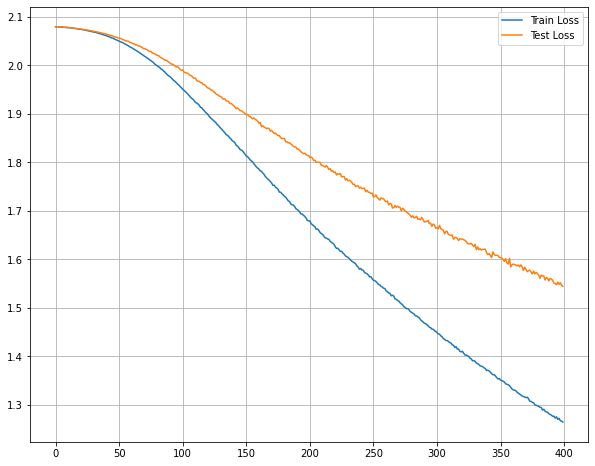

In [10]:
plt.figure(figsize = (10, 8))
plt.plot(loss_tr, label = 'Train Loss')
plt.plot(loss_ts, label = 'Test Loss')
plt.legend()
plt.grid()
plt.show()

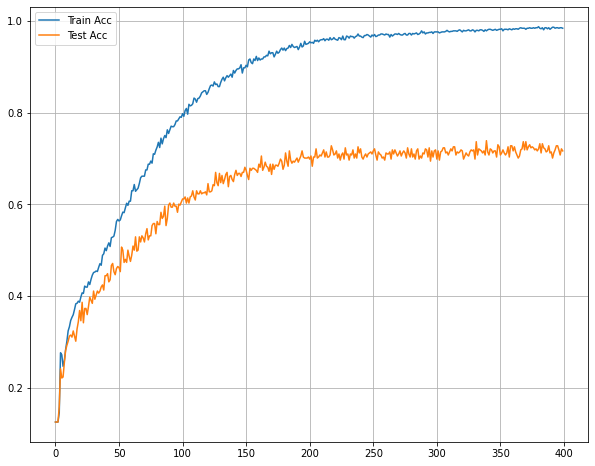

In [11]:
plt.figure(figsize = (10, 8))
plt.plot(acc_tr, label = 'Train Acc')
plt.plot(acc_ts, label = 'Test Acc')
plt.legend()
plt.grid()
plt.show()

# 2-2(a) Construct a ResNet with residual blocks for image recognition and plot the learning curve, accuracy rate, try to stack more blocks as you can (ResNet-18 is recommended), you can refer to the paper for implementation. (15%)

## 參考Open Source Code去做

In [12]:
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__() # Pytorch 避免出現warnings
        ## 捲積 + 標準化 + 積活函數
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, padding=1, bias=False)
        self.b1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, padding=1, bias=False)
        self.b2 = nn.BatchNorm2d(out_channels)
        self.ACT = nn.ReLU(inplace=True)
        self.downsample = downsample # Resnet的部分，外生給定

    def forward(self, input):
        residual = input # 輸入殘差(其實就是資料本身)，用殘差訓練模型
        x = self.conv1(input)
        x = self.b1(x)
        x = self.ACT(x)
        x = self.conv2(x)
        x = self.b2(x)
        if self.downsample:
            residual = self.downsample(residual)
        x += residual
        x = self.ACT(x)
        return x

In [17]:
class Resnet(nn.Module):
    # 建構Resnet
    # Source Code的矩陣大小：224*224
    def __init__(self, block, num_layer, n_classes=8, input_channels=3):
        super(Resnet, self).__init__()
        self.in_channels = 64 # 至少輸入維度為64
        ## 捲積層基本配備
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.b1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)
        self.ACT = nn.ReLU(inplace=True)
        ## Resnet的weight_layer
        self.layer1 = self.weight_layer(block, 64, num_layer[0])
        self.layer2 = self.weight_layer(block, 128, num_layer[1], 2)
        self.layer3 = self.weight_layer(block, 256, num_layer[2], 2)
        self.layer4 = self.weight_layer(block, 512, num_layer[3], 2)
        # 原本論文是kernel_size = 7，但由於image的size = 5，因此必須縮減大小。這邊選 2
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=1)
        self.fc = nn.Linear(4608, n_classes) # 6144是根據前面神經網路層結果決定的
        
        # 參數初始化，Source Code所包含
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1.0)
                nn.init.constant_(m.bias, 0.0)


    def weight_layer(self, block, out_channels, num_block, stride=1):
        downsample = None
        # 根據論文的演算法所寫：在滿足特定狀況下，會改寫layer的結構，避免out of bound
        if stride != 1 or self.in_channels != out_channels*block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels*block.expansion, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*block.expansion)
            )
        # 所有layer做為output
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample)) # 儲存block(構成Resnet的主要組成)
        ### 更新in_channels的值
        self.in_channels = out_channels*block.expansion
        # 將所有組成放入layer
        for _ in range(1, num_block):
            layers.append(block(self.in_channels, out_channels))
        return nn.Sequential(*layers) # Pass by reference

    def forward(self, input):
        x = self.conv1(input)
        x = self.b1(x)
        x = self.ACT(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [18]:
def training(epochs, opt, model, Loss, x, y, by, x_test, y_test, by_test):
    loss_tr = list()
    loss_ts = list()
    acc_tr = list()
    acc_ts = list()
    for epoch in range(1, epochs + 1):
        outputs = model(x)
        loss = Loss(outputs, by)
        opt.zero_grad()
        loss.backward()
        opt.step()
        o = model(x_test)
        loss_tr.append(float(loss))
        loss_ts.append(float(Loss(o, by_test)))
        ACC = (torch.argmax(outputs, axis = 1) == torch.tensor(y)).sum()/x.shape[0]
        acc_tr.append(ACC)
        ACC = (torch.argmax(o, axis = 1) == torch.tensor(y_test)).sum()/x_test.shape[0]
        acc_ts.append(ACC)
        print("Epoch-{0}, Train Loss: {1} , Acc: {2}; Test Loss: {3}, Acc: {4}".format(epoch, loss_tr[-1]
                                                                                         ,acc_tr[-1], loss_ts[-1],
                                                                                         acc_ts[-1]))
    return loss_tr, loss_ts, acc_tr, acc_ts

In [19]:
model = Resnet(BasicBlock, [2, 2, 2, 2],)
OPT = torch.optim.Adam(model.parameters(), lr = 0.001)
Loss = nn.CrossEntropyLoss()
loss_tr, loss_ts, acc_tr, acc_ts = training(150, OPT, model, Loss, batch[IDX1], torch.tensor(labels)[IDX1], blabel[IDX1],
         batch[IDX2], torch.tensor(labels)[IDX2], blabel[IDX2])

/tmp/ipykernel_2130317/3459145924.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ACC = (torch.argmax(outputs, axis = 1) == torch.tensor(y)).sum()/x.shape[0]
/tmp/ipykernel_2130317/3459145924.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ACC = (torch.argmax(o, axis = 1) == torch.tensor(y_test)).sum()/x_test.shape[0]


Epoch-1, Train Loss: 2.19071102142334 , Acc: 0.09772727638483047; Test Loss: 6.46579122543335, Acc: 0.2879464328289032
Epoch-2, Train Loss: 6.233428001403809 , Acc: 0.3215909004211426; Test Loss: 4.1672563552856445, Acc: 0.1316964328289032
Epoch-3, Train Loss: 3.868368148803711 , Acc: 0.13181817531585693; Test Loss: 3.671036958694458, Acc: 0.2053571492433548
Epoch-4, Train Loss: 3.431060314178467 , Acc: 0.21022726595401764; Test Loss: 3.0914721488952637, Acc: 0.2834821343421936
Epoch-5, Train Loss: 2.879757881164551 , Acc: 0.37840908765792847; Test Loss: 2.8863675594329834, Acc: 0.3035714328289032
Epoch-6, Train Loss: 2.6741011142730713 , Acc: 0.37727272510528564; Test Loss: 2.4502220153808594, Acc: 0.3191964328289032
Epoch-7, Train Loss: 2.2251956462860107 , Acc: 0.3954545557498932; Test Loss: 2.0510568618774414, Acc: 0.3325892984867096
Epoch-8, Train Loss: 1.8998814821243286 , Acc: 0.3863636255264282; Test Loss: 1.9311798810958862, Acc: 0.2790178656578064
Epoch-9, Train Loss: 1.73951

Epoch-75, Train Loss: 6.16915785940364e-05 , Acc: 1.0; Test Loss: 1.2383679151535034, Acc: 0.7611607313156128
Epoch-76, Train Loss: 6.0280530306044966e-05 , Acc: 1.0; Test Loss: 1.2388485670089722, Acc: 0.7611607313156128
Epoch-77, Train Loss: 5.89504670642782e-05 , Acc: 1.0; Test Loss: 1.2393419742584229, Acc: 0.7611607313156128
Epoch-78, Train Loss: 5.7710207329364493e-05 , Acc: 1.0; Test Loss: 1.2398278713226318, Acc: 0.7611607313156128
Epoch-79, Train Loss: 5.653711923514493e-05 , Acc: 1.0; Test Loss: 1.2403128147125244, Acc: 0.7611607313156128
Epoch-80, Train Loss: 5.543297083931975e-05 , Acc: 1.0; Test Loss: 1.2407959699630737, Acc: 0.7611607313156128
Epoch-81, Train Loss: 5.439681262942031e-05 , Acc: 1.0; Test Loss: 1.2412641048431396, Acc: 0.7589285969734192
Epoch-82, Train Loss: 5.341197902453132e-05 , Acc: 1.0; Test Loss: 1.2417242527008057, Acc: 0.7589285969734192
Epoch-83, Train Loss: 5.247630906524137e-05 , Acc: 1.0; Test Loss: 1.24217689037323, Acc: 0.7589285969734192
Epo

Epoch-149, Train Loss: 2.8171409212518483e-05 , Acc: 1.0; Test Loss: 1.25469172000885, Acc: 0.765625
Epoch-150, Train Loss: 2.798068271658849e-05 , Acc: 1.0; Test Loss: 1.254773497581482, Acc: 0.765625


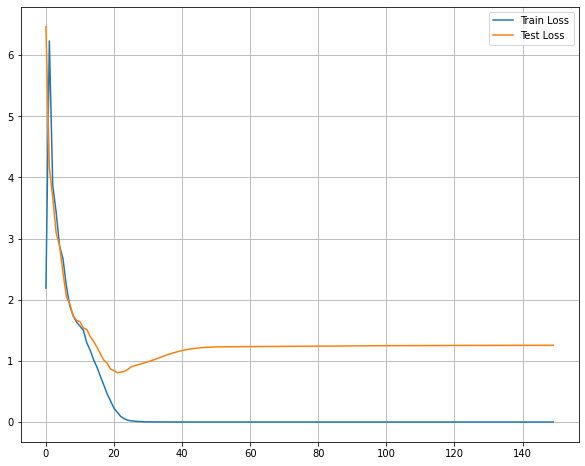

In [20]:
plt.figure(figsize = (10, 8))
plt.plot(loss_tr, label = 'Train Loss')
plt.plot(loss_ts, label = 'Test Loss')
plt.legend()
plt.grid()
plt.show()

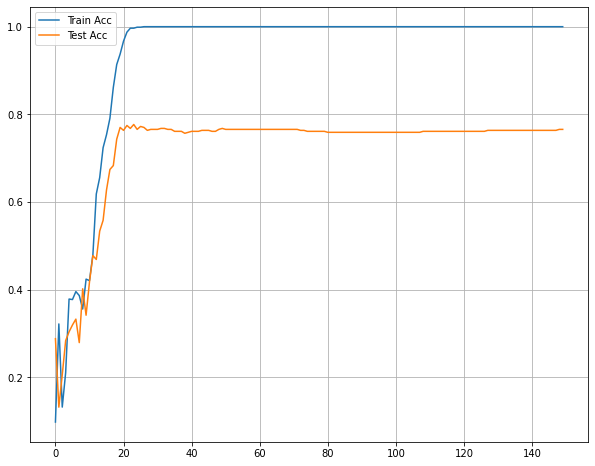

In [21]:
plt.figure(figsize = (10, 8))
plt.plot(acc_tr, label = 'Train Acc')
plt.plot(acc_ts, label = 'Test Acc')
plt.legend()
plt.grid()
plt.show()

In [22]:
torch.save(model, 'Resnet.pt')

# 2-2(b) Remove the identity mapping and repeat (a), then do some discussion on the results of (a) and (b). Please describe what you found. (5%)


In [23]:
class BasicBlock2(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock2, self).__init__() # Pytorch 避免出現warnings
        ## 捲積 + 標準化 + 積活函數
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, padding=1, bias=False)
        self.b1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, padding=1, bias=False)
        self.b2 = nn.BatchNorm2d(out_channels)
        self.ACT = nn.ReLU(inplace=True)
        self.downsample = downsample # Resnet的部分，外生給定

    def forward(self, input):
        residual = input # 輸入殘差(其實就是資料本身)，用殘差訓練模型
        x = self.conv1(input)
        x = self.b1(x)
        x = self.ACT(x)
        x = self.conv2(x)
        x = self.b2(x)
        #if self.downsample:
        #    residual = self.downsample(residual)
        #x += residual
        x = self.ACT(x)
        return x

In [24]:
model = Resnet(BasicBlock2, [2, 2, 2, 2],)
OPT = torch.optim.Adam(model.parameters(), lr = 0.001)
Loss = nn.CrossEntropyLoss()
loss_tr, loss_ts, acc_tr, acc_ts = training(150, OPT, model, Loss, batch[IDX1], torch.tensor(labels)[IDX1], blabel[IDX1],
         batch[IDX2], torch.tensor(labels)[IDX2], blabel[IDX2])

/tmp/ipykernel_2130317/3459145924.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ACC = (torch.argmax(outputs, axis = 1) == torch.tensor(y)).sum()/x.shape[0]
/tmp/ipykernel_2130317/3459145924.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ACC = (torch.argmax(o, axis = 1) == torch.tensor(y_test)).sum()/x_test.shape[0]


Epoch-1, Train Loss: 2.1518094539642334 , Acc: 0.1090909093618393; Test Loss: 3.7377676963806152, Acc: 0.1651785671710968
Epoch-2, Train Loss: 3.6264119148254395 , Acc: 0.16022726893424988; Test Loss: 2.9901435375213623, Acc: 0.1339285671710968
Epoch-3, Train Loss: 2.6452243328094482 , Acc: 0.1352272778749466; Test Loss: 2.5133907794952393, Acc: 0.1272321492433548
Epoch-4, Train Loss: 2.339808225631714 , Acc: 0.13181817531585693; Test Loss: 2.3314778804779053, Acc: 0.1272321492433548
Epoch-5, Train Loss: 2.220825672149658 , Acc: 0.1295454502105713; Test Loss: 2.2661540508270264, Acc: 0.1272321492433548
Epoch-6, Train Loss: 2.1053619384765625 , Acc: 0.1295454502105713; Test Loss: 2.3603718280792236, Acc: 0.1227678582072258
Epoch-7, Train Loss: 2.0853488445281982 , Acc: 0.13750000298023224; Test Loss: 2.443315267562866, Acc: 0.140625
Epoch-8, Train Loss: 2.074240207672119 , Acc: 0.14772726595401764; Test Loss: 2.558695077896118, Acc: 0.1495535671710968
Epoch-9, Train Loss: 2.069566011428

Epoch-69, Train Loss: 0.8587129712104797 , Acc: 0.6670454740524292; Test Loss: 2.620056629180908, Acc: 0.484375
Epoch-70, Train Loss: 0.7889022827148438 , Acc: 0.7034090757369995; Test Loss: 2.704336166381836, Acc: 0.4620535671710968
Epoch-71, Train Loss: 0.6992946267127991 , Acc: 0.7193182110786438; Test Loss: 2.68465256690979, Acc: 0.4709821343421936
Epoch-72, Train Loss: 0.6231578588485718 , Acc: 0.7431818246841431; Test Loss: 2.6909282207489014, Acc: 0.53125
Epoch-73, Train Loss: 0.5559605360031128 , Acc: 0.7920454740524292; Test Loss: 2.6935462951660156, Acc: 0.5625
Epoch-74, Train Loss: 0.47010374069213867 , Acc: 0.8477272987365723; Test Loss: 2.739431142807007, Acc: 0.5825892686843872
Epoch-75, Train Loss: 0.41765615344047546 , Acc: 0.8659090995788574; Test Loss: 2.821399211883545, Acc: 0.5357142686843872
Epoch-76, Train Loss: 0.46179667115211487 , Acc: 0.8477272987365723; Test Loss: 3.1816153526306152, Acc: 0.5044642686843872
Epoch-77, Train Loss: 0.6516568064689636 , Acc: 0.78

Epoch-140, Train Loss: 0.00037411111406981945 , Acc: 1.0; Test Loss: 2.8633079528808594, Acc: 0.7299107313156128
Epoch-141, Train Loss: 0.0003634207823779434 , Acc: 1.0; Test Loss: 2.865288257598877, Acc: 0.7299107313156128
Epoch-142, Train Loss: 0.0003537030715961009 , Acc: 1.0; Test Loss: 2.8672046661376953, Acc: 0.7299107313156128
Epoch-143, Train Loss: 0.0003447987837716937 , Acc: 1.0; Test Loss: 2.869068145751953, Acc: 0.7299107313156128
Epoch-144, Train Loss: 0.00033644316135905683 , Acc: 1.0; Test Loss: 2.870889902114868, Acc: 0.7299107313156128
Epoch-145, Train Loss: 0.00032849665149115026 , Acc: 1.0; Test Loss: 2.872661590576172, Acc: 0.7299107313156128
Epoch-146, Train Loss: 0.00032087659928947687 , Acc: 1.0; Test Loss: 2.87438702583313, Acc: 0.7299107313156128
Epoch-147, Train Loss: 0.00031357191619463265 , Acc: 1.0; Test Loss: 2.8760738372802734, Acc: 0.7299107313156128
Epoch-148, Train Loss: 0.0003066214267164469 , Acc: 1.0; Test Loss: 2.8777337074279785, Acc: 0.7299107313

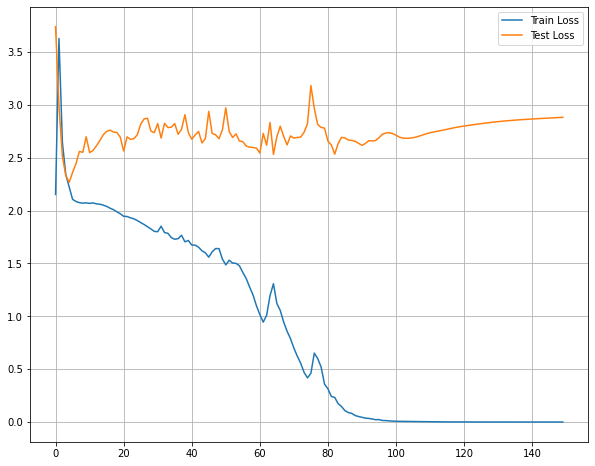

In [25]:
plt.figure(figsize = (10, 8))
plt.plot(loss_tr, label = 'Train Loss')
plt.plot(loss_ts, label = 'Test Loss')
plt.legend()
plt.grid()
plt.show()

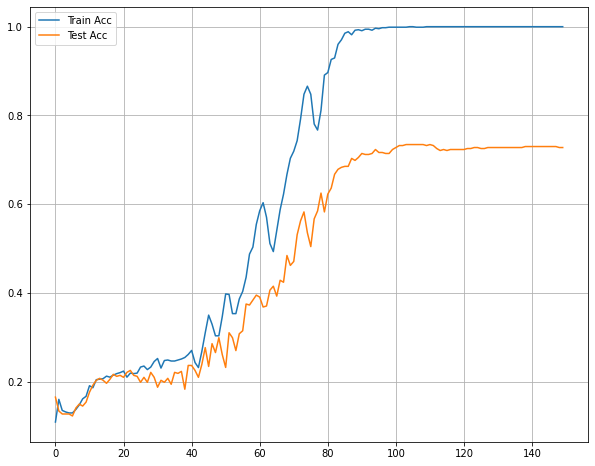

In [26]:
plt.figure(figsize = (10, 8))
plt.plot(acc_tr, label = 'Train Acc')
plt.plot(acc_ts, label = 'Test Acc')
plt.legend()
plt.grid()
plt.show()

In [27]:
torch.save(model, 'without_identity_Resnet.pt')

## 【Discussion】從上面實驗中，我們發現到identity map可以大幅改善Resnet的performance。在同樣150個epoch下，resnet with identity map的loss和accuracy可以穩定且明顯收斂，準確率也較高，反觀resnet without identity map的test loss收斂了但是train loss卻未收斂，準確率上可以發現到明顯較前者表現不佳。

## 綜上所述，Identity map在Resnet中如同扮演資料原始輸入輸出的角色，CNN的layer則是負責Feature extraction。因此在有原始資料下，以及CNN的特徵萃取，才讓模型有更多的資料資訊可以訓練，從而有更好的表現。